In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

**tensorflow:** Main library for deep learning.

**keras:** High-level API in TensorFlow for building neural networks.

**Sequential:** A linear stack of layers.

**Dense:** Fully connected neural network layer.

**Flatten:** Converts 2D input (like 28x28 images) into a 1D vector.

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Loads the MNIST dataset (handwritten digits 0–9).

X_train, y_train: training images and labels.

X_test, y_test: test images and labels.

Each image is 28x28 grayscale, and each label is a digit (0–9).



In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

/tmp/ipython-input-2272406174.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


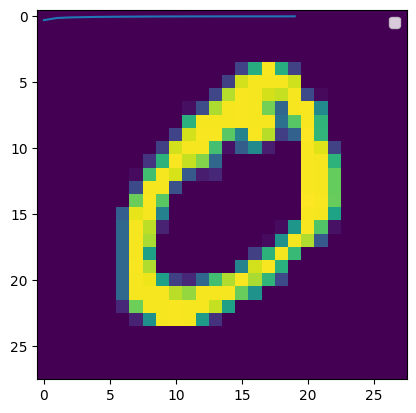

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])


**Normalizing the data**

In [8]:
X_train = X_train/255
X_test = X_test/255

Normalizes pixel values from [0, 255] to [0, 1] for better training performance.

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Building the Neural Network**

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Creates a neural network with:

Flatten: Converts each 28x28 image to a 784-length vector.

Dense(128, relu): Hidden layer with 128 neurons using ReLU.

**Model Summary**

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the model-- loss function**


In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

**Model Training**

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8670 - loss: 0.4791 - val_accuracy: 0.9561 - val_loss: 0.1553
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9603 - loss: 0.1382 - val_accuracy: 0.9641 - val_loss: 0.1190
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9742 - loss: 0.0866 - val_accuracy: 0.9725 - val_loss: 0.0958
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9812 - loss: 0.0626 - val_accuracy: 0.9719 - val_loss: 0.1001
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9865 - loss: 0.0462 - val_accuracy: 0.9718 - val_loss: 0.0928
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9900 - loss: 0.0352 - val_accuracy: 0.9754 - val_loss: 0.0837
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9917 - loss: 0.0277 - val_accuracy: 0.9758 - val_loss: 0.0862
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9934 - loss: 0.0222 

Trains for 20 epochs using 80% data for training and 20% for validation.

Prediction

In [14]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)

Accuracy score

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.98

In [17]:
import pandas as pd
pd.DataFrame(history.history).head()

,accuracy,loss,val_accuracy,val_loss
0,0.917333,0.291300,0.956083,0.155299
1,0.962854,0.127097,0.964083,0.119013
2,0.974271,0.086595,0.972500,0.095829
3,0.980729,0.064228,0.971917,0.100053
4,0.985604,0.049019,0.971750,0.092769


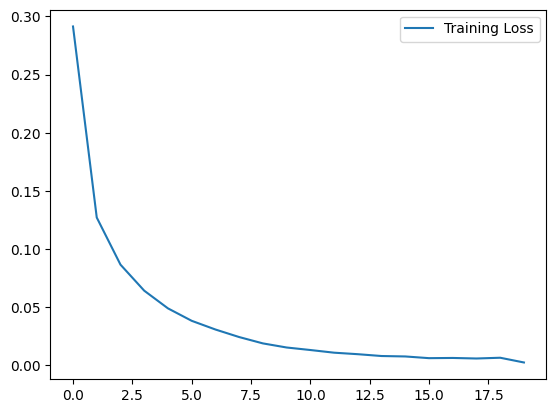

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

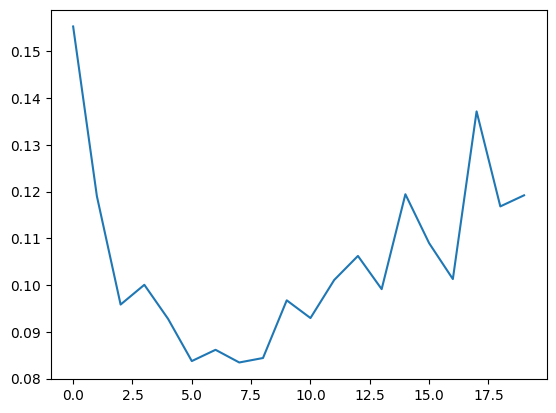

In [19]:
plt.plot(history.history['val_loss'], label='validation')

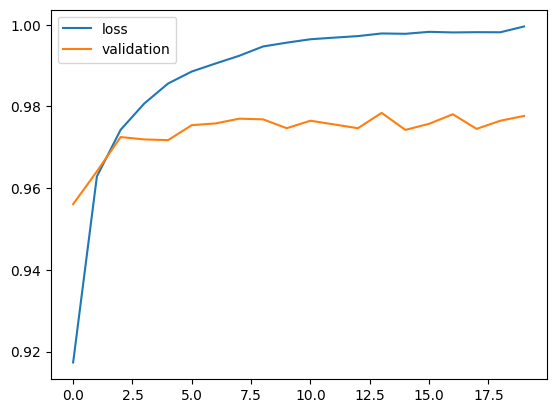

In [20]:
#Accuracy loss
plt.plot(history.history['accuracy'], label='loss')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9773 - val_loss: 0.1265
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.9789 - val_loss: 0.1174
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9990 - loss: 0.0027 - val_accuracy: 0.9769 - val_loss: 0.1356
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.9779 - val_loss: 0.1243
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9781 - val_loss: 0.1417


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Text(0.5, 1.0, 'Predicted: 2')

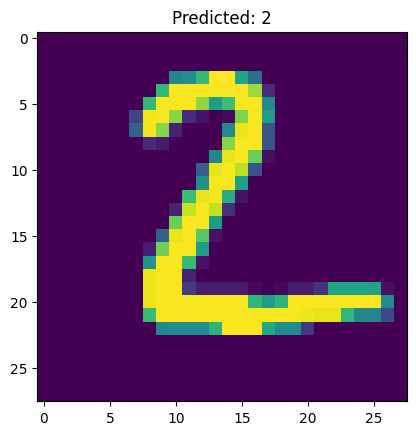

In [31]:
plt.imshow(X_test[1])
plt.title(f"Predicted: {model.predict(X_test[1].reshape(1,28,28)).argmax()}")


In [22]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([2])

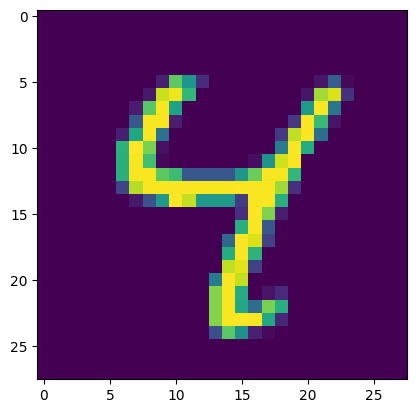

In [23]:
plt.imshow(X_test[6])

In [24]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([4])

<Axes: >

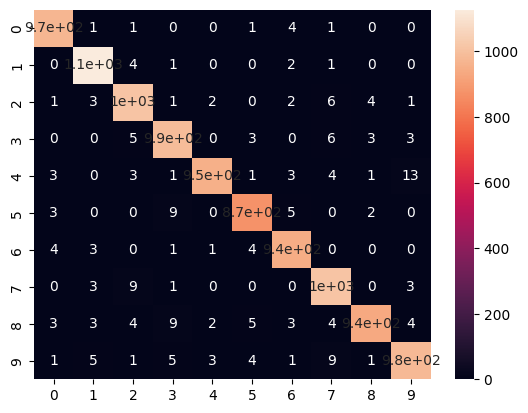

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


In [35]:
model.save('mnist_model.keras')



In [38]:
from google.colab import files
files.download('mnist_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pickle

# After training your Keras model, get architecture and weights
model_json = model.to_json()
model_weights = model.get_weights()

# Store both in a Python dictionary
model_data = {'model_json': model_json, 'weights': model_weights}

# Save to pickle
with open('mnist_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)
print("Model saved as mnist_model.pkl")


Model saved as mnist_model.pkl


In [28]:
from google.colab import files
files.download('mnist_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>